In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
training_data = pd.read_csv('./training_data.csv')
training_data.sample(10)

,user_id,movie_id,rating,title,genre,age,gender,occupation
631,13,186,4,"Blues Brothers, The (1980)",4,47,1,0
521,655,346,4,Jackie Brown (1997),7,50,0,1
335,405,1478,1,Dead Presidents (1995),7,22,0,1
39,405,440,1,Amityville II: The Possession (1982),10,22,0,1
616,655,248,2,Grosse Pointe Blank (1997),5,50,0,1
813,13,624,5,"Three Caballeros, The (1945)",2,47,1,0
684,13,178,4,12 Angry Men (1957),7,47,1,0
223,405,1018,1,Tie Me Up! Tie Me Down! (1990),7,22,0,1
602,655,297,4,Ulee's Gold (1997),7,50,0,1
443,655,572,2,Blown Away (1994),15,50,0,1


In [3]:
test_data = pd.read_csv('./test_data.csv')
test_data.sample(10)

,user_id,movie_id,rating,title,genre,age,gender,occupation
333,655,178,4,12 Angry Men (1957),7,50,0,1
237,655,845,2,That Thing You Do! (1996),4,50,0,1
518,13,790,2,Tommy Boy (1995),4,47,1,0
353,655,242,4,Kolya (1996),4,50,0,1
89,405,1556,1,Condition Red (1995),15,22,0,1
195,405,1475,1,Bhaji on the Beach (1993),4,22,0,1
242,655,403,2,Batman (1989),1,50,0,1
17,405,288,5,Scream (1996),10,22,0,1
319,655,980,2,Mother Night (1996),7,50,0,1
258,655,270,4,Gattaca (1997),7,50,0,1


In [4]:
valid_data = pd.read_csv('./valid_data.csv')
valid_data.sample(10)

,user_id,movie_id,rating,title,genre,age,gender,occupation
48,405,716,1,Home for the Holidays (1995),7,22,0,1
205,655,953,3,Unstrung Heroes (1995),4,50,0,1
85,405,55,1,"Professional, The (1994)",13,22,0,1
134,405,1271,2,North (1994),4,22,0,1
570,13,882,3,Washington Square (1997),7,47,1,0
310,655,1090,3,Sliver (1993),15,50,0,1
449,13,897,1,Time Tracers (1995),1,47,1,0
144,405,464,1,Vanya on 42nd Street (1994),7,22,0,1
498,13,911,2,Twilight (1998),5,47,1,0
133,405,448,4,"Omen, The (1976)",10,22,0,1


In [5]:
with open('./recommendations.pkl', 'rb') as f:
    recommendations = pickle.load(f)
    
recommendations

defaultdict(list,
            {655: [(-5, 423),
              (np.float64(-4.52830676185821), 56),
              (np.float64(-4.52830676185821), 467),
              (np.float64(-4.52830676185821), 624),
              (np.float64(-4.47169323814179), 186),
              (np.float64(-3.94338647628358), 452),
              (np.float64(-3.5849202855746296), 519),
              (np.float64(-3.94338647628358), 73),
              (np.float64(-3.94338647628358), 673),
              (np.float64(-3.5283067618582096), 72),
              (np.float64(-1.0), 217),
              (np.float64(-3.05661352371642), 226),
              (np.float64(-3.5283067618582096), 88),
              (np.float64(-3.4716932381417895), 90),
              (np.float64(-2.0566135237164196), 308),
              (np.float64(-3.11322704743284), 570),
              (np.float64(-3.94338647628358), 318),
              (np.float64(-3.5283067618582096), 178),
              (np.float64(-2.5849202855746296), 720),
              (np.fl

In [6]:
recommendations_dict = {
    'user_id': [],
    'movie_id' : [],
    'imputed_rating': [],
}
for user_id, recommendation_list in recommendations.items():
    recommendations_dict['user_id'] += ([user_id] * len(recommendation_list))
    recommendations_dict['movie_id'] += ([recommendation[1] for recommendation in recommendation_list])
    recommendations_dict['imputed_rating'] += ([-recommendation[0] for recommendation in recommendation_list])


recommendations_df = pd.DataFrame(recommendations_dict)
recommendations_df.sample(10)

,user_id,movie_id,imputed_rating
115,13,647,2.050874
41,655,788,1.000000
56,405,198,3.497122
1,655,56,4.528307
84,405,294,2.497122
25,655,230,2.528307
32,655,588,3.056614
45,405,64,4.502878
69,405,354,2.000000
33,655,396,2.056614


In [7]:
recommendations_df.shape

(137, 3)

In [8]:
test_merged_df = recommendations_df.merge(right=test_data, how='inner', on=['user_id', 'movie_id'])
print(test_merged_df.shape)
test_merged_df

(24, 9)


,user_id,movie_id,imputed_rating,rating,title,genre,age,gender,occupation
0,655,423,5.000000,3,E.T. the Extra-Terrestrial (1982),3,50,0,1
1,655,467,4.528307,3,"Bronx Tale, A (1993)",7,50,0,1
2,655,186,4.471693,3,"Blues Brothers, The (1980)",4,50,0,1
3,655,178,3.528307,4,12 Angry Men (1957),7,50,0,1
4,655,212,3.113227,3,"Unbearable Lightness of Being, The (1988)",7,50,0,1
5,655,2,2.056614,3,GoldenEye (1995),15,50,0,1
6,655,514,3.113227,5,Annie Hall (1977),13,50,0,1
7,655,396,2.056614,2,Serial Mom (1994),5,50,0,1
8,405,161,3.508633,1,Top Gun (1986),0,22,0,1
9,405,198,3.497122,2,Nikita (La Femme Nikita) (1990),15,22,0,1


In [9]:
valid_merged_df = recommendations_df.merge(right=valid_data, how='inner', on=['user_id', 'movie_id'])
print(valid_merged_df.shape)
valid_merged_df

(32, 9)


,user_id,movie_id,imputed_rating,rating,title,genre,age,gender,occupation
0,655,56,4.528307,3,Pulp Fiction (1994),5,50,0,1
1,655,673,3.943386,3,Cape Fear (1962),15,50,0,1
2,655,226,3.056614,3,Die Hard 2 (1990),15,50,0,1
3,655,88,3.528307,2,Sleepless in Seattle (1993),13,50,0,1
4,655,318,3.943386,4,Schindler's List (1993),7,50,0,1
5,655,451,2.886773,3,Grease (1978),4,50,0,1
6,405,48,4.502878,1,Hoop Dreams (1994),6,22,0,1
7,405,64,4.502878,5,"Shawshank Redemption, The (1994)",7,22,0,1
8,405,208,4.005756,5,Young Frankenstein (1974),10,22,0,1
9,405,215,3.508633,5,Field of Dreams (1989),7,22,0,1


In [10]:
test_merged_df['rating_diff'] = abs(test_merged_df['rating'] - test_merged_df['imputed_rating'])
test_merged_df['rating_diff'].mean()

np.float64(1.4323208305797908)

In [11]:
valid_merged_df['rating_diff'] = abs(valid_merged_df['rating'] - valid_merged_df['imputed_rating'])
valid_merged_df['rating_diff'].mean()

np.float64(1.533737072569778)

In [12]:
for user_id in recommendations.keys():
    print(f'User {user_id}\'s MAE on test dataset:', test_merged_df.loc[test_merged_df['user_id'] == user_id]['rating_diff'].mean())
    print(f'User {user_id}\'s MAE on valid dataset:', valid_merged_df.loc[valid_merged_df['user_id'] == user_id]['rating_diff'].mean())
    print()

User 655's MAE on test dataset: 1.0589616547677239
User 655's MAE on valid dataset: 0.7044090158109467

User 405's MAE on test dataset: 2.2011511265170265
User 405's MAE on valid dataset: 1.8005755632585134

User 13's MAE on test dataset: 1.3543864602898232
User 13's MAE on valid dataset: 1.6779610371738802



In [13]:
mape = (test_merged_df['rating_diff'] / test_merged_df['rating']).mean() * 100
accuracy_mape = 100 - mape 
accuracy_mape

np.float64(30.927805978893034)

In [14]:
mape = (valid_merged_df['rating_diff'] / valid_merged_df['rating']).mean() * 100
accuracy_mape = 100 - mape 
accuracy_mape

np.float64(21.429292669593124)

In [15]:
def precision_at_k(actual, predicted, k=5):
    num_rel_items_in_k = len(set(predicted[: k]).intersection(set(actual)))
    return num_rel_items_in_k / k

def recall_at_k(actual, predicted, k=5):
    total_num_rel_items = len(actual)
    num_rel_items_in_k = len(set(predicted[: k]).intersection(set(actual)))
    return num_rel_items_in_k / total_num_rel_items

def f1(actual, predicted, k=5):
    p = precision_at_k(actual, predicted, k=k)
    r = recall_at_k(actual, predicted, k=k)
    denom = 0

    if p == 0 and r == 0:
        denom = 0
    elif p == 0:
        denom = (1 / r)
    elif r == 0:
        denom = (1 / p)
    else:
        denom = ((1 / p) + (1 / r))

    if denom == 0:
        return 0
    
    return 2 / denom

In [16]:
test_actual = []
valid_actual = []

ordered_recommendations = []

for user_id in sorted(list(recommendations.keys())):
    print(user_id)
    test_actual.append(list(test_data.loc[test_data['user_id'] == user_id]['movie_id'].values))
    valid_actual.append(list(valid_data.loc[valid_data['user_id'] == user_id]['movie_id'].values))

    ordered_recommendations.append([np.int64(t[1]) for t in recommendations[user_id]])

13
405
655


In [17]:
ks = [int(k) for k in np.arange(5, 101, 5)]

user_a_precision = []
user_a_recall = []
user_a_f1 = []

user_b_precision = []
user_b_recall = []
user_b_f1 = []

user_c_precision = []
user_c_recall = []
user_c_f1 = []

for k in ks:
    user_a_precision.append(precision_at_k(test_actual[0], ordered_recommendations[0], k=k))
    user_a_recall.append(recall_at_k(test_actual[0], ordered_recommendations[0], k=k))
    user_a_f1.append(f1(test_actual[0], ordered_recommendations[0], k=k))
    
    user_b_precision.append(precision_at_k(test_actual[1], ordered_recommendations[1], k=k))
    user_b_recall.append(recall_at_k(test_actual[1], ordered_recommendations[1], k=k))
    user_b_f1.append(f1(test_actual[1], ordered_recommendations[1], k=k))

    user_c_precision.append(precision_at_k(test_actual[2], ordered_recommendations[2], k=k))
    user_c_recall.append(recall_at_k(test_actual[2], ordered_recommendations[2], k=k))
    user_c_f1.append(f1(test_actual[2], ordered_recommendations[2], k=k))


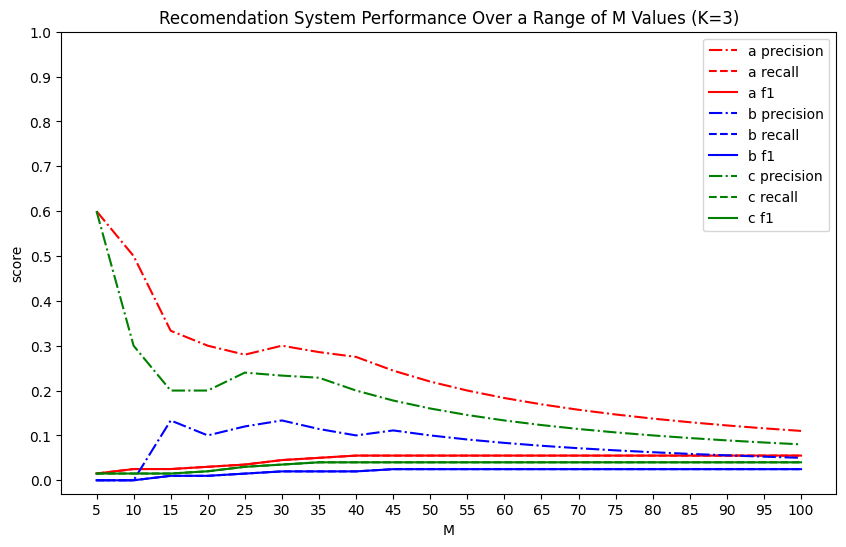

In [18]:
plt.figure(figsize=(10, 6))

plt.plot(ks, user_a_precision, label="a precision", color="red", linestyle="-.")
plt.plot(ks, user_a_recall, label="a recall", color="red", linestyle="--")
plt.plot(ks, user_a_recall, label="a f1", color="red", linestyle="-")

plt.plot(ks, user_b_precision, label="b precision", color="blue", linestyle="-.")
plt.plot(ks, user_b_recall, label="b recall", color="blue", linestyle="--")
plt.plot(ks, user_b_recall, label="b f1", color="blue", linestyle="-")

plt.plot(ks, user_c_precision, label="c precision", color="green", linestyle="-.")
plt.plot(ks, user_c_recall, label="c recall", color="green", linestyle="--")
plt.plot(ks, user_c_recall, label="c f1", color="green", linestyle="-")


plt.xticks(ks)
plt.yticks(list(np.arange(0, 1.1, 0.1)))

plt.legend()

plt.title('Recomendation System Performance Over a Range of M Values (K=3)')
plt.xlabel('M')
plt.ylabel('score')

plt.show()